In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 



In [8]:
im = cv2.imread("assets/milky-way.jpg")
gray_im = cv2. cvtColor(im,cv2.COLOR_BGR2GRAY)

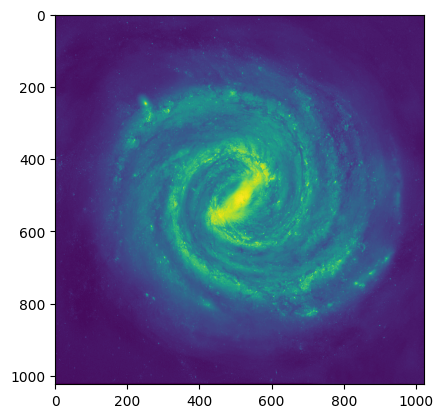

In [9]:
plt.imshow(gray_im)

In [10]:
gray_im

array([[13, 11, 16, ..., 13, 15, 19],
       [14, 12, 16, ..., 11, 13, 15],
       [14, 11, 15, ..., 14, 15, 15],
       ...,
       [ 2,  2,  2, ..., 13, 13, 14],
       [ 1,  0,  0, ..., 12, 11, 11],
       [ 2,  2,  1, ..., 13, 12, 11]], dtype=uint8)

In [11]:
def init_matrix(n,c):
    U = np.random.rand(n, c)
    U = U / np.sum(U, axis=1, keepdims=True)  # Normalize rows to sum to 1
    return U

In [14]:
def calculate_cluster_centers(U,X,m):
    centers = np.zeros(U.shape[1])
    Um = U ** m
    centers = np.dot(Um.T,X) / np.sum(Um.T,axis = 1,keepdims=True)
    return centers


In [20]:
def update_matrix(U, centers, X, m):
    n = X.shape[0]  
    c = centers.shape[0]  
    n_U = np.zeros((n, c))  

    # Calculate distances between each point and each cluster center
    dists = np.zeros((n, c))  
    for j in range(c):
        dists[:, j] = np.linalg.norm(X - centers[j], axis=1)  # Distance from each point to cluster center
    p = 2 / (m-1)
    # Update membership values
    for i in range(n):
        for j in range(c):
            denom = np.sum([(dists[i, j] / (dists[i, k] ** p)) for k in range(c) if dists[i, k] != 0])  
            n_U[i, j] = 1 / denom if denom != 0 else 0  

    # Normalize memberships
    n_U /= np.sum(n_U, axis=1, keepdims=True)  

    return n_U


In [34]:
def fuzzy_c_means(X, c, m=2, max_iter=10, tol=1e-5):
    n = X.shape[0]
    U = init_matrix(n, c)
    centers = np.random.rand(c, X.shape[1])  # Random initial cluster centers

    for _ in range(max_iter):
        U_old = U.copy()  
        centers = calculate_cluster_centers(U, X, m)  
        U = update_matrix(U, centers, X, m) 
        
        if np.linalg.norm(U - U_old) < tol:
            break

    return U, centers


In [29]:
def cluster_image(U,centers,img):
    img_shape = img.shape
    cluster_img = np.zeros(img_shape)
    cluster_choice = np.argmax(U,axis=1)
    cluster_choice = cluster_choice.reshape(img_shape)
    n_centers = centers.shape[0]
    for j in range (n_centers):
        cluster_img[cluster_choice==j] = centers[j]
    return cluster_img


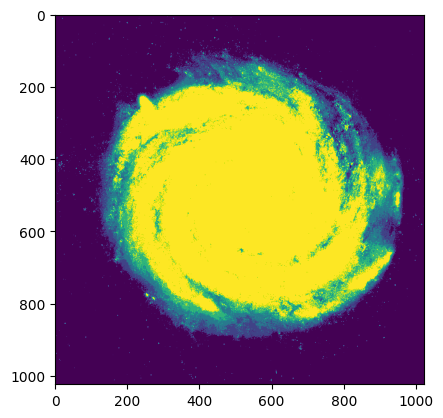

In [35]:
I = gray_im
I = I / 255
X = I.reshape(-1,1)
# Number of clusters
c = 5

# Fuzziness parameter 
m = 2
n = X.size
U, centers = fuzzy_c_means(X, c, m)
c_i = cluster_image(U,centers,gray_im)
plt.imshow(c_i)

# print("Membership Matrix (U):")
# print(U)
# print("Cluster Centers:")
# print(centers)